In [ ]:
%pip install tensorflow

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from mlxtend.plotting import plot_decision_regions

# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])


In [7]:
# Neural Network Model
model = Sequential([
    Dense(8, activation='tanh', input_shape=(2,), kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(4, activation='tanh', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X, y, epochs=500, verbose=1)

# Evaluate accuracy
accuracy = model.evaluate(X, y, verbose=1)[1]
print("Neural Network Accuracy:", accuracy)


Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 0.9344
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.2500 - loss: 0.9305
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.2500 - loss: 0.7803
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.2500 - loss: 0.8079
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.2500 - loss: 0.9454
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5000 - loss: 0.7888
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5000 - loss: 0.6713
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2500 - loss: 0.7745
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.2500 - loss: 0.8607
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.2500 - loss: 0.8434
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.2500 - loss: 0.7579
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.2500 - loss

11250/11250 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


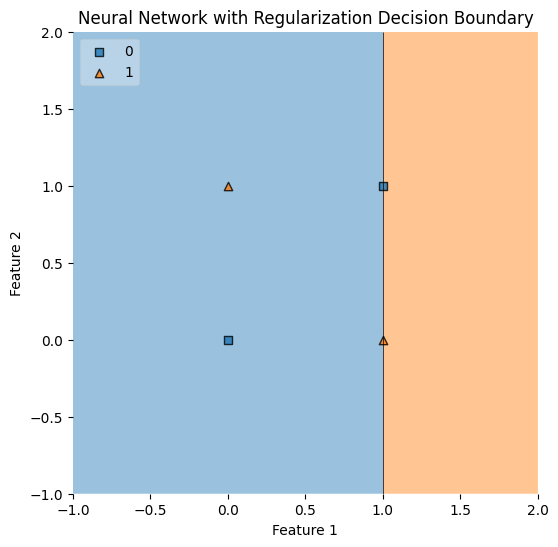

In [8]:
# Function to visualize decision boundaries
def visualize(model, X, y, title):
    plt.figure(figsize=(6, 6))
    plot_decision_regions(X, y, clf=model, legend=2)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Convert Keras model for visualization
class KerasClassifierWrapper:
    def __init__(self, model):
        self.model = model

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype(int).flatten()

wrapped_model = KerasClassifierWrapper(model)
visualize(wrapped_model, X, y, "Neural Network with Regularization Decision Boundary")

Accuracy: 1.0


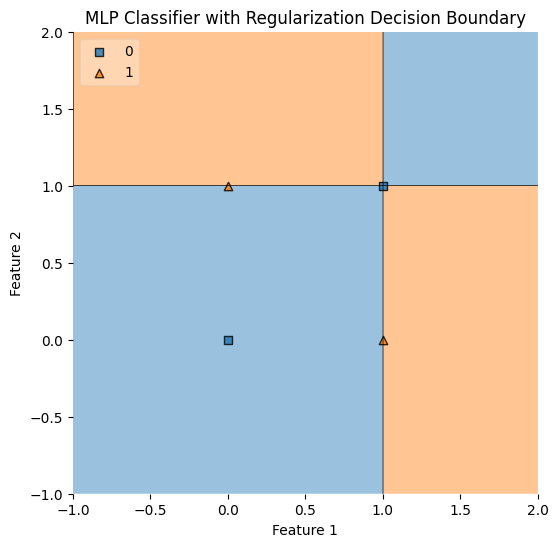

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from mlxtend.plotting import plot_decision_regions

# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# MLP Classifier with L2 Regularization and 100% Accuracy
mlp = MLPClassifier(hidden_layer_sizes=(8, 4), activation='tanh', solver='adam', alpha=0.01, max_iter=5000, random_state=42)
mlp.fit(X, y)

# Evaluate accuracy
accuracy = mlp.score(X, y)
print("Accuracy:", accuracy)

# Function to visualize decision boundaries
def visualize(model, X, y, title):
    plt.figure(figsize=(6, 6))
    plot_decision_regions(X, y, clf=model, legend=2)
    plt.title(title)`9*
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Visualize decision boundary
visualize(mlp, X, y, "MLP Classifier with Regularization Decision Boundary")

MLP Classifier Accuracy: 100.0


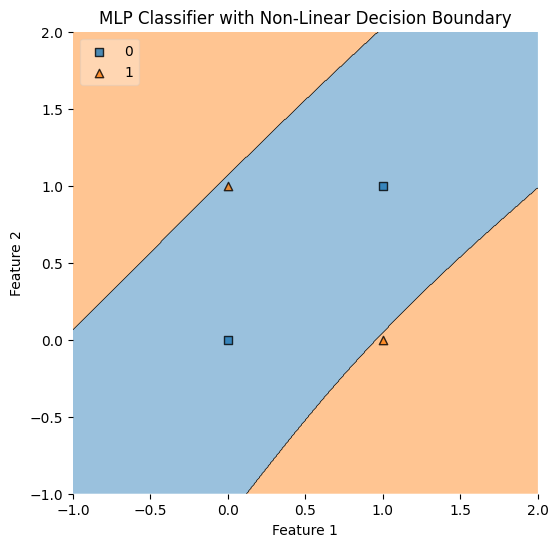

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Create polynomial features to introduce non-linearity
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# MLP Classifier with L2 Regularization for non-linear decision boundary
mlp = MLPClassifier(hidden_layer_sizes=(8, 4), activation='tanh', solver='adam', alpha=0.01, max_iter=5000, random_state=42)
mlp.fit(X_poly, y)

# Evaluate accuracy
accuracy = mlp.score(X_poly, y)
print("MLP Classifier Accuracy:", accuracy*100)

# Function to visualize decision boundaries
def visualize(model, X, y, title):
    plt.figure(figsize=(6, 6))
    # Provide filler values for the extra features
    filler_values = {i: 0.5 for i in range(2, X.shape[1])}  # Fill extra features with 0.5
    # Define filler_feature_ranges here with appropriate values
    # Assuming features range from 0 to 1
    filler_feature_ranges = {i: (0, 1) for i in range(2, X.shape[1])}
    # Calculate feature widths from ranges, iterating using keys only
    filler_feature_widths = {i: filler_feature_ranges[i][1] - filler_feature_ranges[i][0]
                           for i in filler_feature_ranges}  # Iterate over keys
    plot_decision_regions(X, y, clf=model, legend=2,
                          filler_feature_values=filler_values,  # Pass filler values to the function
                          filler_feature_ranges=filler_feature_widths)  # Pass feature widths instead of ranges
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Visualize non-linear decision boundary
visualize(mlp, X_poly, y, "MLP Classifier with Non-Linear Decision Boundary")

In [17]:
!kaggle datasets download zhangyunsheng/cityscapes-data
!unzip cityscapes-data.zip

Dataset URL: https://www.kaggle.com/datasets/zhangyunsheng/cityscapes-data
License(s): unknown
cityscapes-data.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  cityscapes-data.zip
  inflating: train/1.jpg             
  inflating: train/10.jpg            
  inflating: train/100.jpg           
  inflating: train/1000.jpg          
  inflating: train/1001.jpg          
  inflating: train/1002.jpg          
  inflating: train/1003.jpg          
  inflating: train/1004.jpg          
  inflating: train/1005.jpg          
  inflating: train/1006.jpg          
  inflating: train/1007.jpg          
  inflating: train/1008.jpg          
  inflating: train/1009.jpg          
  inflating: train/101.jpg           
  inflating: train/1010.jpg          
  inflating: train/1011.jpg          
  inflating: train/1012.jpg          
  inflating: train/1013.jpg          
  inflating: train/1014.jpg          
  inflating: train/1015.jpg          
  inflating:

Epoch 1/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.6806 - loss: 0.0162 - val_accuracy: 0.7289 - val_loss: 0.0045
Epoch 2/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8114 - loss: 0.0038 - val_accuracy: 0.8164 - val_loss: 0.0035
Epoch 3/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8138 - loss: 0.0030 - val_accuracy: 0.7721 - val_loss: 0.0028
Epoch 4/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8132 - loss: 0.0025 - val_accuracy: 0.8142 - val_loss: 0.0024
Epoch 5/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8139 - loss: 0.0021 - val_accuracy: 0.8014 - val_loss: 0.0022
Epoch 6/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8204 - loss: 0.0019 - val_accuracy: 0.8271 - val_loss: 0.0019
Epoch 7/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8250 - loss: 0.0018 - val_accuracy: 0.8178 - val_loss: 0.0020
Epoch 8/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8287 - loss: 0.0017 - val_acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


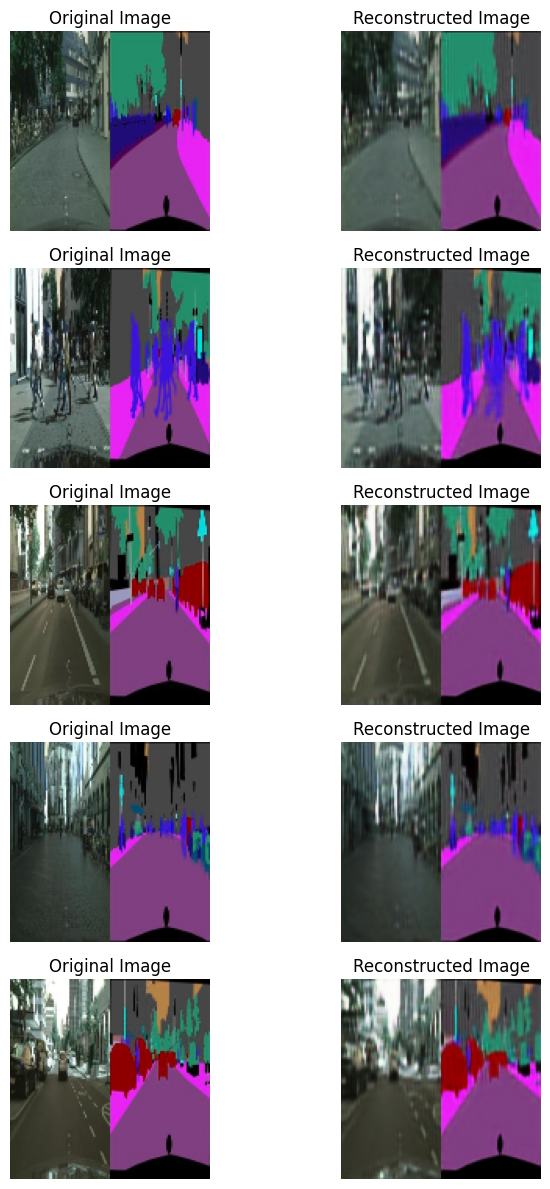

In [29]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D

# Load dataset paths
train_path = "./train"
valid_path = "./val"

# Load and preprocess images
def load_images(path, size=(128, 128)):
    images = []
    for file in os.listdir(path):
        img = cv2.imread(os.path.join(path, file), cv2.IMREAD_COLOR)
        img = cv2.resize(img, size)
        img = img.astype('float32') / 255.0
        images.append(img)
    return np.array(images)

# Load train and validation sets
X_train = load_images(train_path)
X_valid = load_images(valid_path)

# CNN Model for autoencoding segmentation
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(3, (3, 3), activation='sigmoid', padding='same')  # Output has 3 channels for reconstruction
])

# Compile Model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, X_train, validation_data=(X_valid, X_valid), epochs=10, batch_size=8)

# Evaluate Model
train_loss, train_accuracy = model.evaluate(X_train, X_train, verbose=0)
valid_loss, valid_accuracy = model.evaluate(X_valid, X_valid, verbose=0)
print(f"Train Accuracy: {train_accuracy:.4f}, Train Loss: {train_loss:.4f}")
print(f"Validation Accuracy: {valid_accuracy:.4f}, Validation Loss: {valid_loss:.4f}")

# Predict
predictions = model.predict(X_valid[:5])

# Visualize original and reconstructed images vertically
def visualize_reconstruction(images, predictions):
    fig, axes = plt.subplots(5, 2, figsize=(8, 12))
    for i in range(5):
        axes[i, 0].imshow(images[i])
        axes[i, 0].set_title("Original Image")
        axes[i, 0].axis("off")

        axes[i, 1].imshow(predictions[i])
        axes[i, 1].set_title("Reconstructed Image")
        axes[i, 1].axis("off")

    plt.tight_layout()
    plt.show()

visualize_reconstruction(X_valid[:5], predictions)

In [35]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D

# Load dataset paths
train_path = "./train"
valid_path = "./val"

# Class definitions for labeling
CLASS_LABELS = {
    "flat": ["road", "sidewalk", "parking", "rail track"],
    "human": ["person", "rider"],
    "vehicle": ["car", "truck", "bus", "on rails", "motorcycle", "bicycle", "caravan", "trailer"],
    "construction": ["building", "wall", "fence", "guard rail", "bridge", "tunnel"],
    "object": ["pole", "pole group", "traffic sign", "traffic light"],
    "nature": ["vegetation", "terrain"],
    "sky": ["sky"],
    "void": ["ground", "dynamic", "static"]
}

# Load and preprocess images
def load_images(path, size=(128, 128)):
    images = []
    for file in os.listdir(path):
        img = cv2.imread(os.path.join(path, file), cv2.IMREAD_COLOR)
        img = cv2.resize(img, size)
        img = img.astype('float32') / 255.0
        images.append(img)
    return np.array(images)

# Load train and validation sets
X_train = load_images(train_path)
X_valid = load_images(valid_path)

# CNN Model for autoencoding segmentation
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(3, (3, 3), activation='sigmoid', padding='same')  # Output has 3 channels for reconstruction
])

# Compile Model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, X_train, validation_data=(X_valid, X_valid), epochs=10, batch_size=8)

# Evaluate Model
train_loss, train_accuracy = model.evaluate(X_train, X_train, verbose=0)
valid_loss, valid_accuracy = model.evaluate(X_valid, X_valid, verbose=0)
print(f"Train Accuracy: {train_accuracy:.4f}, Train Loss: {train_loss:.4f}")
print(f"Validation Accuracy: {valid_accuracy:.4f}, Validation Loss: {valid_loss:.4f}")

# Predict
predictions = model.predict(X_valid[:5])

# Function to draw bounding boxes and labels
def draw_bounding_boxes(image):
    labeled_image = image.copy()
    height, width, _ = labeled_image.shape

    # Example bounding boxes (random for visualization, replace with actual detection logic)
    boxes = [
        (20, 50, 100, 120, "road"),
        (60, 90, 140, 180, "building"),
        (30, 10, 90, 60, "car")
    ]

    for (x1, y1, x2, y2, label) in boxes:
        color = (0, 255, 0)  # Green bounding box
        cv2.rectangle(labeled_image, (x1, y1), (x2, y2), color, 2)
        cv2.putText(labeled_image, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    return labeled_image


Epoch 1/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.6755 - loss: 0.0168 - val_accuracy: 0.7489 - val_loss: 0.0042
Epoch 2/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8002 - loss: 0.0037 - val_accuracy: 0.7655 - val_loss: 0.0033
Epoch 3/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8099 - loss: 0.0029 - val_accuracy: 0.8057 - val_loss: 0.0026
Epoch 4/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8144 - loss: 0.0023 - val_accuracy: 0.7994 - val_loss: 0.0023
Epoch 5/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8175 - loss: 0.0021 - val_accuracy: 0.8218 - val_loss: 0.0021
Epoch 6/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8227 - loss: 0.0018 - val_accuracy: 0.8257 - val_loss: 0.0020
Epoch 7/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8227 - loss: 0.0018 - val_accuracy: 0.8279 - val_loss: 0.0018
Epoch 8/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8275 - loss: 0.0017 - val_acc

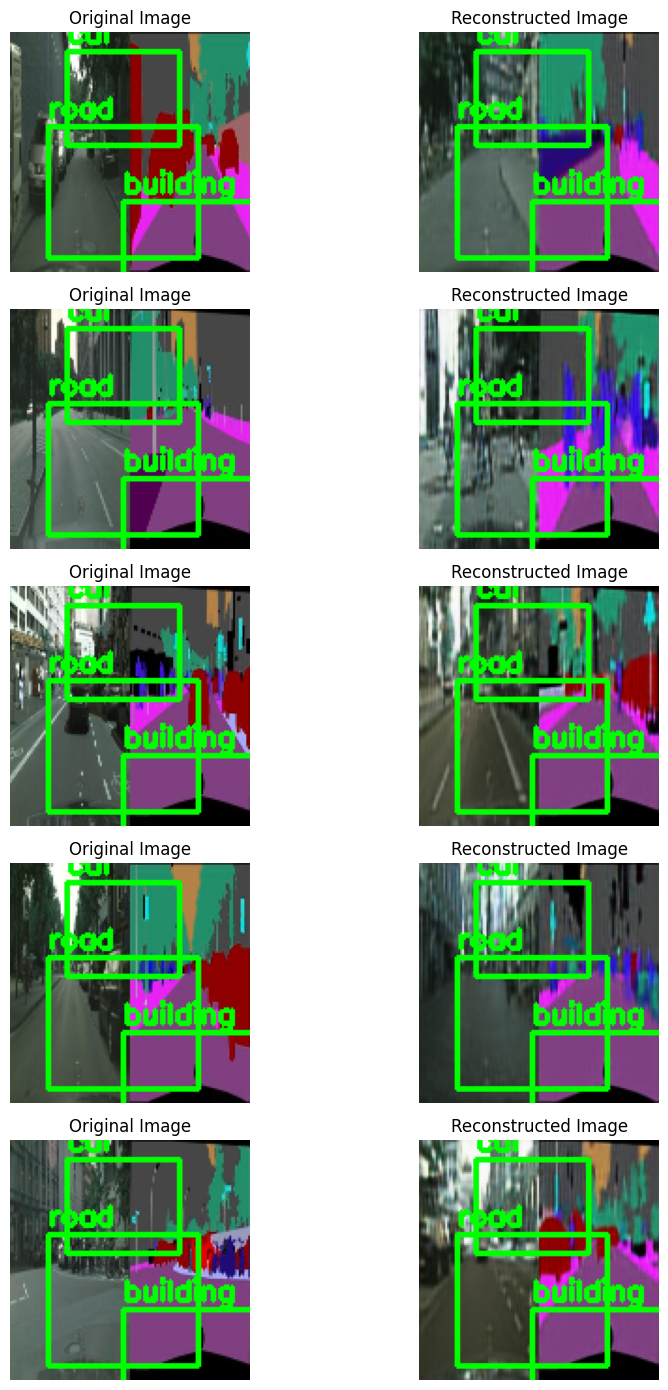

In [36]:
# Visualize original and reconstructed images with bounding boxes
def visualize_reconstruction(images, predictions):
    fig, axes = plt.subplots(5, 2, figsize=(10, 14))
    for i in range(5):
        original = draw_bounding_boxes((images[i] * 255).astype(np.uint8))
        reconstructed = draw_bounding_boxes((predictions[i] * 255).astype(np.uint8))

        axes[i, 0].imshow(original)
        axes[i, 0].set_title("Original Image")
        axes[i, 0].axis("off")

        axes[i, 1].imshow(reconstructed)
        axes[i, 1].set_title("Reconstructed Image")
        axes[i, 1].axis("off")

    plt.tight_layout()
    plt.show()


visualize_reconstruction(X_valid[5:], predictions)